<a href="https://colab.research.google.com/github/Raghu010/Regression-Using-Neural-Network/blob/master/Advertising_dataset_Multi_layer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install seaborn
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-jkhk1nid
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-jkhk1nid
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0-cp36-none-any.whl size=80596 sha256=cb4f75973d7490f0a31f26d2f8507798ce2522af29870c677086c6c96e9cabcd
  Stored in directory: /tmp/pip-ephem-wheel-cache-lk79yb59/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pathlib

In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [16]:
data = pd.read_csv('/content/Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [17]:
Data = data.drop(['Unnamed: 0'], axis = 1)
Data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [18]:
Data.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [19]:
Data.index

RangeIndex(start=0, stop=200, step=1)

In [20]:
Data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [21]:
Data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [0]:
train_data = Data.sample(frac = 0.8, random_state = 0)
test_data = Data.drop(train_data.index)

In [23]:
train_data

,TV,radio,newspaper,sales
18,69.2,20.5,18.3,11.3
170,50.0,11.6,18.4,8.4
107,90.4,0.3,23.2,8.7
98,289.7,42.3,51.2,25.4
177,170.2,7.8,35.2,11.7
...,...,...,...,...
53,182.6,46.2,58.7,21.2
157,149.8,1.3,24.3,10.1
128,220.3,49.0,3.2,24.7
34,95.7,1.4,7.4,9.5


In [24]:
test_data

,TV,radio,newspaper,sales
9,199.8,2.6,21.2,10.6
21,237.4,5.1,23.5,12.5
25,262.9,3.5,19.5,12.0
29,70.6,16.0,40.8,10.5
31,112.9,17.4,38.6,11.9
32,97.2,1.5,30.0,9.6
36,266.9,43.8,5.0,25.4
39,228.0,37.7,32.0,21.5
47,239.9,41.5,18.5,23.2
58,210.8,49.6,37.7,23.8


In [25]:
train_data.shape

(160, 4)

In [26]:
test_data.shape

(40, 4)

In [27]:
Data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

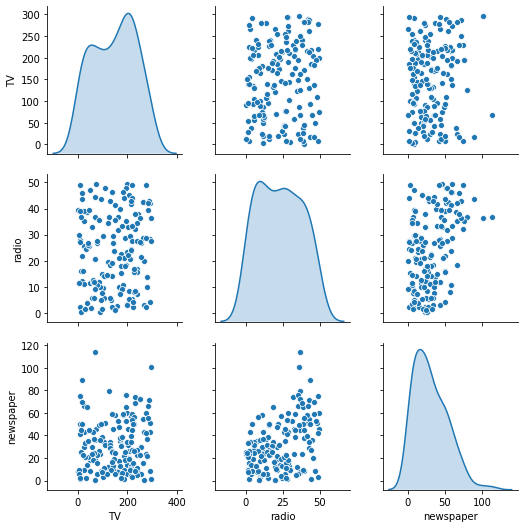

In [28]:
sn.pairplot(train_data[['TV', 'radio', 'newspaper']], diag_kind = 'kde')

In [29]:
train_stats = train_data.describe()
train_stats.pop('sales')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
TV,160.0,146.878750,86.316062,0.7,68.850,154.05,217.025,296.4
radio,160.0,23.334375,14.528246,0.3,10.625,23.45,35.925,49.4
newspaper,160.0,31.211875,22.439631,0.3,12.200,26.30,46.050,114.0


In [30]:
train_label = train_data.pop('sales')
train_label.shape

(160,)

In [31]:
test_label = test_data.pop('sales')
test_label.shape

(40,)

In [0]:
def norm(x):
  return (x - train_stats['mean'])/train_stats['std']
normed_train_data = norm(train_data) 
normed_test_data = norm(test_data)

In [33]:
len(train_data.keys())

3

In [34]:
train_data.keys()

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [0]:
def build_model():
  model = tf.keras.Sequential([
                       tf.keras.layers.Dense(240, activation = 'relu', input_shape = [len(train_data.keys())]),
                       tf.keras.layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.1)
  model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mae', 'mse'])
  return model

In [36]:
Model = build_model()
Model

In [37]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 240)               960       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 241       
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


In [38]:
example_batch = normed_train_data[:10]
example_predict = Model.predict(example_batch)
example_predict

array([[ 0.03184238],
       [-0.06276253],
       [-0.05011811],
       [ 0.05029287],
       [ 0.03503746],
       [-0.15798514],
       [-0.09961412],
       [ 0.42405522],
       [-0.11362206],
       [ 0.2667161 ]], dtype=float32)

In [39]:
EPOCHS = 1000

history = Model.fit(normed_train_data, train_label, epochs = EPOCHS, verbose = 0, validation_split= 0.2, callbacks = [tfdocs.modeling.EpochDots()])


Epoch: 0, loss:171.0392,  mae:11.6171,  mse:171.0392,  val_loss:49.2486,  val_mae:5.9336,  val_mse:49.2486,  
....................................................................................................
Epoch: 100, loss:0.8725,  mae:0.6725,  mse:0.8725,  val_loss:0.6364,  val_mae:0.6238,  val_mse:0.6364,  
....................................................................................................
Epoch: 200, loss:0.5896,  mae:0.5605,  mse:0.5896,  val_loss:0.4982,  val_mae:0.4866,  val_mse:0.4982,  
....................................................................................................
Epoch: 300, loss:0.3615,  mae:0.4332,  mse:0.3615,  val_loss:0.3403,  val_mae:0.4521,  val_mse:0.3403,  
....................................................................................................
Epoch: 400, loss:0.6312,  mae:0.5619,  mse:0.6312,  val_loss:3.2579,  val_mae:1.4971,  val_mse:3.2579,  
.................................................................

In [40]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,1.292655,0.859232,1.292655,0.503412,0.564140,0.503412,995
996,0.598016,0.602688,0.598015,0.636597,0.660163,0.636597,996
997,0.285920,0.403107,0.285920,0.349273,0.458535,0.349273,997
998,0.486737,0.539298,0.486737,0.613316,0.595069,0.613316,998
999,0.608001,0.613478,0.608001,2.362569,1.183156,2.362569,999


In [41]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std= 0.2)
plotter

Text(0, 0.5, 'MAE [sales]')

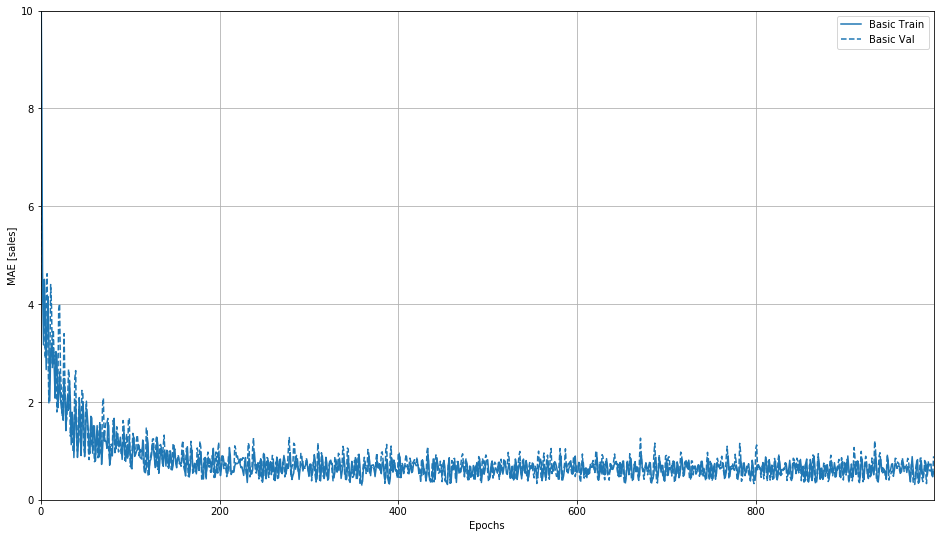

In [42]:
plt.figure(figsize=(16, 9))
plotter.plot({'Basic' : history}, metric = 'mae')

plt.ylim([0, 10])
plt.ylabel('MAE [sales]')

Text(0, 0.5, 'MAE [sales]')

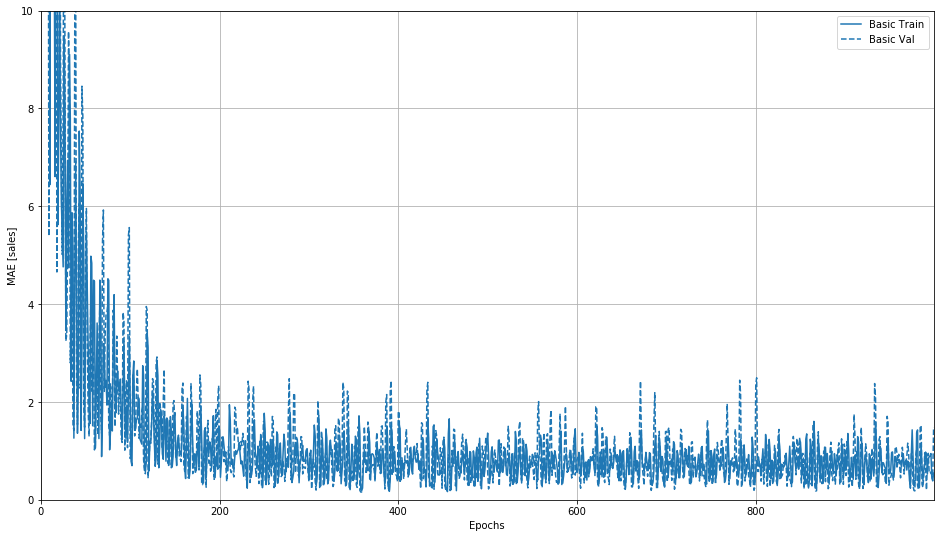

In [43]:
plt.figure(figsize = (16, 9))
plotter.plot({'Basic' : history}, metric = 'mse')
plt.ylim([0, 10])
plt.ylabel('MAE [sales]')

In [44]:
model = build_model()

early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 20)

early_history = Model.fit(normed_train_data, train_label, epochs = EPOCHS, verbose = 0, validation_split= 0.2, callbacks = [early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:1.9433,  mae:1.0451,  mse:1.9433,  val_loss:0.2458,  val_mae:0.3843,  val_mse:0.2458,  
.............................

Text(0, 0.5, 'MAE [sales]')

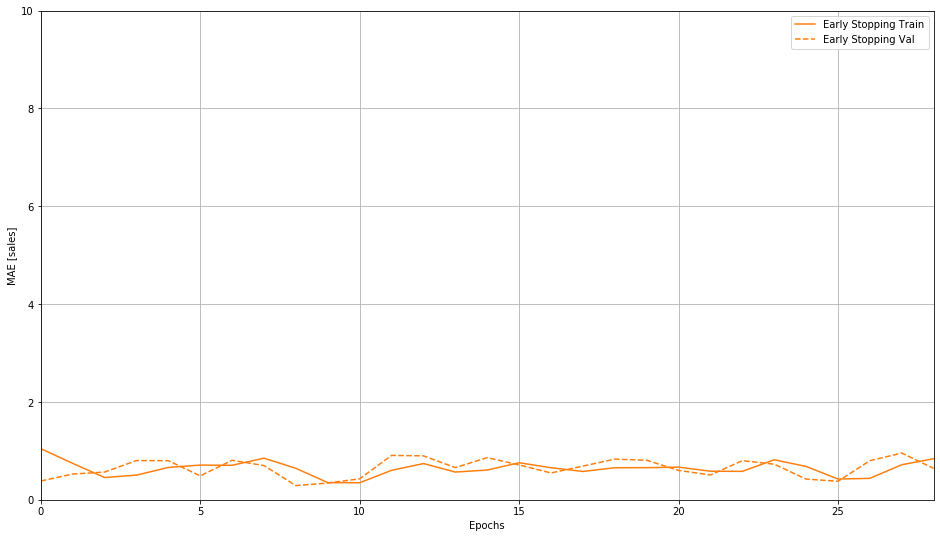

In [45]:
plt.figure(figsize = (16, 9))
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [sales]')

Text(0, 0.5, 'MAE [sales]')

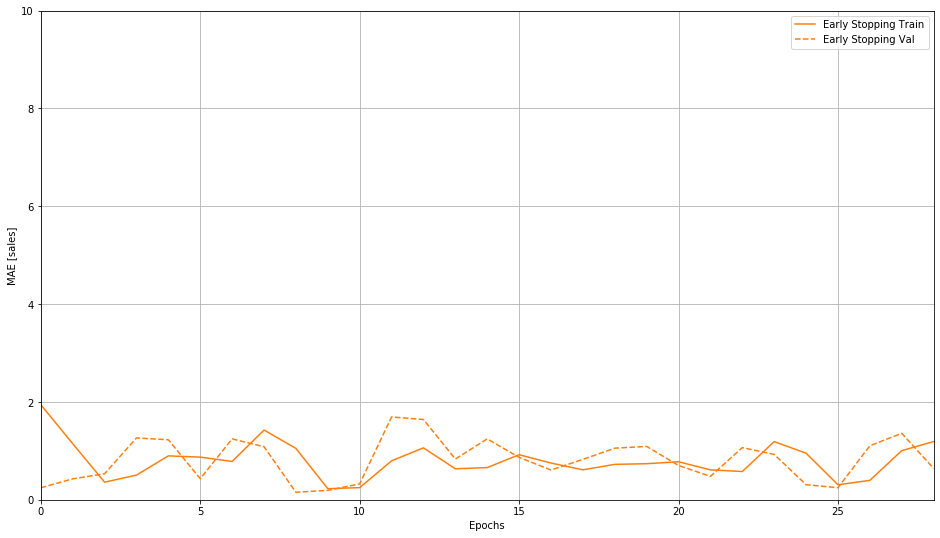

In [46]:
plt.figure(figsize = (16, 9))
plotter.plot({'Early Stopping': early_history}, metric = "mse")
plt.ylim([0, 10])
plt.ylabel('MAE [sales]')

In [47]:
loss, mae, mse = model.evaluate(normed_test_data, test_label, verbose = 2)
print(mae)

40/40 - 0s - loss: 216.4729 - mae: 13.8612 - mse: 216.4729
13.861239


In [48]:
test_predictions = model.predict(normed_test_data).flatten()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Attempting to set identical left == right == 5 results in singular transformations; automatically expanding.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Attempting to set identical bottom == top == 5 results in singular transformations; automatically expanding.
  import sys


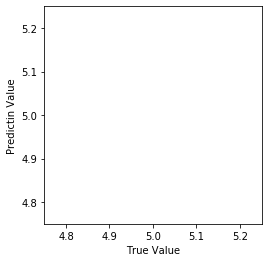

In [49]:
a = plt.axes(aspect = 'equal')
plt.scatter(test_label, test_predictions)
plt.xlabel('True Value')
plt.ylabel('Predictin Value')
lim = [5, 5]
plt.xlim(lim)
plt.ylim(lim)
plt.plot(lim, lim)

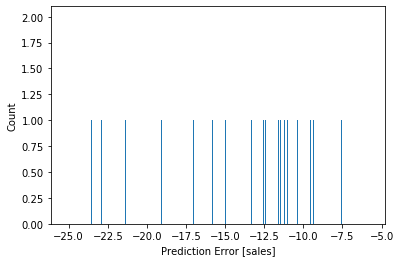

In [50]:
error = test_predictions - test_label
plt.hist(error, bins = 500)
plt.xlabel("Prediction Error [sales]")
_ = plt.ylabel("Count")